This notebook explores car data for price prediction using machine learning. 
Steps: data cleaning, exploratory analysis, feature engineering, linear regression modeling, and model evaluation. Dataset: `car.csv`.

Data import and overview

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data=pd.read_csv("car.csv")

In [151]:
data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


The Data "Car.csv" file has 7 variables Manufacturer, Model, Engine size, Fuel type, Year of manufacture, Mileage, Price.

In [152]:
data.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [153]:
data.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

No null values are present in the data.

In [154]:
# To clear all duplicates if present in the data.
data=data.drop_duplicates()

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [156]:
data_new = pd.get_dummies(data, drop_first=True, dtype='uint8')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine size           49988 non-null  float64
 1   Year of manufacture   49988 non-null  int64  
 2   Mileage               49988 non-null  int64  
 3   Price                 49988 non-null  int64  
 4   Manufacturer_Ford     49988 non-null  uint8  
 5   Manufacturer_Porsche  49988 non-null  uint8  
 6   Manufacturer_Toyota   49988 non-null  uint8  
 7   Manufacturer_VW       49988 non-null  uint8  
 8   Model_911             49988 non-null  uint8  
 9   Model_Cayenne         49988 non-null  uint8  
 10  Model_Fiesta          49988 non-null  uint8  
 11  Model_Focus           49988 non-null  uint8  
 12  Model_Golf            49988 non-null  uint8  
 13  Model_M5              49988 non-null  uint8  
 14  Model_Mondeo          49988 non-null  uint8  
 15  Model_Passat          49

We convert all object-type (categorical) columns into numeric variables using one-hot encoding. This is required for most machine learning models, which cannot directly interpret categorical data. We use `pd.get_dummies` with `drop_first=True` to avoid multicollinearity.

In [157]:
data_new.shape

(49988, 24)

In [158]:
data.shape

(49988, 7)

In [159]:
data_new.describe()

,Engine size,Year of manufacture,Mileage,Price,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_911,Model_Cayenne,...,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Hybrid,Fuel type_Petrol
count,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,...,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,13829.112387,0.299192,0.052193,0.251120,0.298192,0.017444,0.017404,...,0.101164,0.097403,0.099784,0.083440,0.085861,0.032648,0.081820,0.033748,0.224934,0.509722
std,0.734149,9.646056,71624.341062,16417.812203,0.457909,0.222417,0.433662,0.457469,0.130921,0.130773,...,0.301549,0.296509,0.299715,0.276549,0.280161,0.177715,0.274092,0.180582,0.417543,0.499910
min,1.000000,1984.000000,630.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000,1996.000000,54375.250000,3059.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.600000,2004.000000,101011.500000,7971.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2012.000000,158617.250000,19028.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2022.000000,453537.000000,168081.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EXPLORATORY DATA ANALYSIS(EDA)

C:\Users\aadya\AppData\Local\Temp\ipykernel_24048\3976279623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Model',order=order, palette='rainbow')


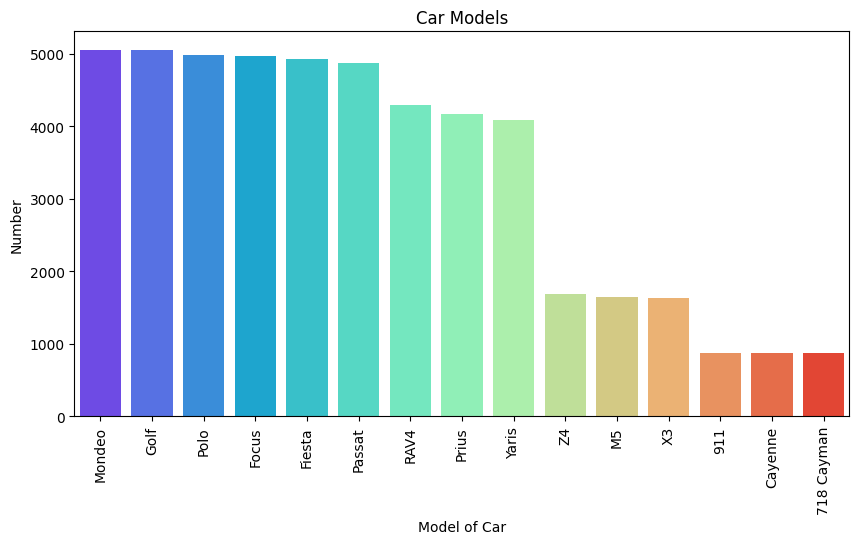

In [160]:
plt.figure(figsize=(10,5))
order = data['Model'].value_counts().index
sns.countplot(data=data, x='Model',order=order, palette='rainbow')
plt.xlabel("Model of Car")
plt.xticks(rotation=90)
plt.ylabel("Number")
plt.title("Car Models")
plt.show()

This count plot displays the frequency of each car model in the dataset. Top five models are Mondeo, Golf, Polo, focus, Fiesta with "Mondeo" is the most popular model and the botton five are M5, X3, 911, cayenne, 718Cayman.

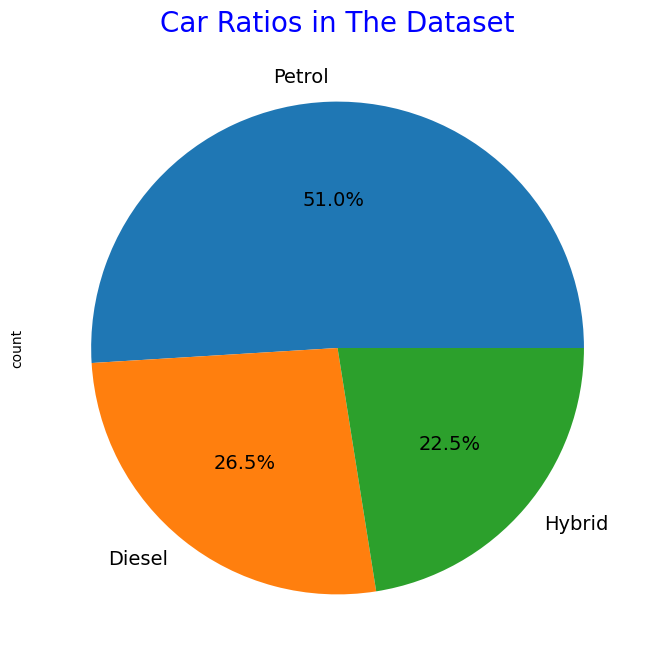

In [161]:
plt.figure(figsize=(8,8))
data['Fuel type'].value_counts().plot.pie(autopct='%1.1f%%', fontsize=14)
plt.title('Car Ratios in The Dataset', color='blue', fontsize=20)
plt.show()

C:\Users\aadya\AppData\Local\Temp\ipykernel_24048\3058595579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Manufacturer", data=data, order=order, palette='rainbow')


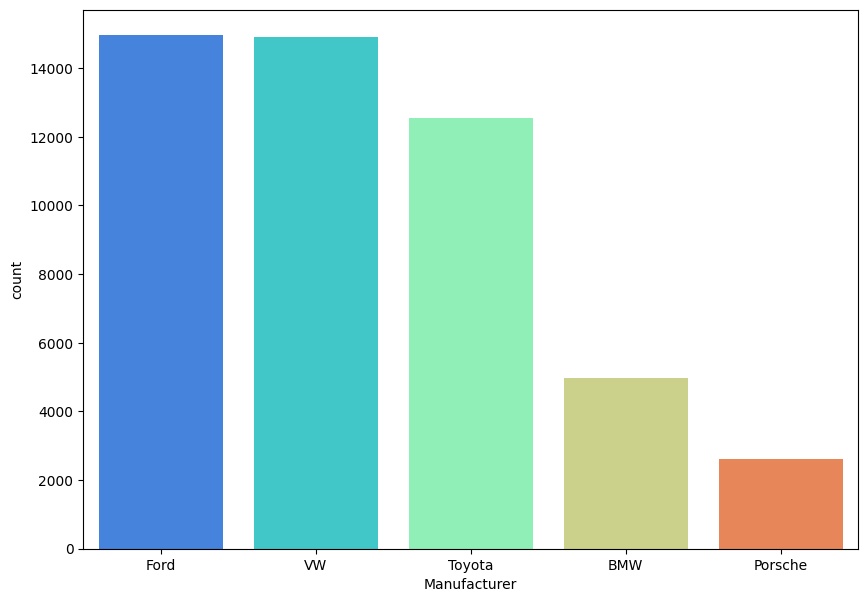

In [162]:
plt.figure(figsize=(10,7))
order = data['Manufacturer'].value_counts().index
sns.countplot(x="Manufacturer", data=data, order=order, palette='rainbow')
plt.show()

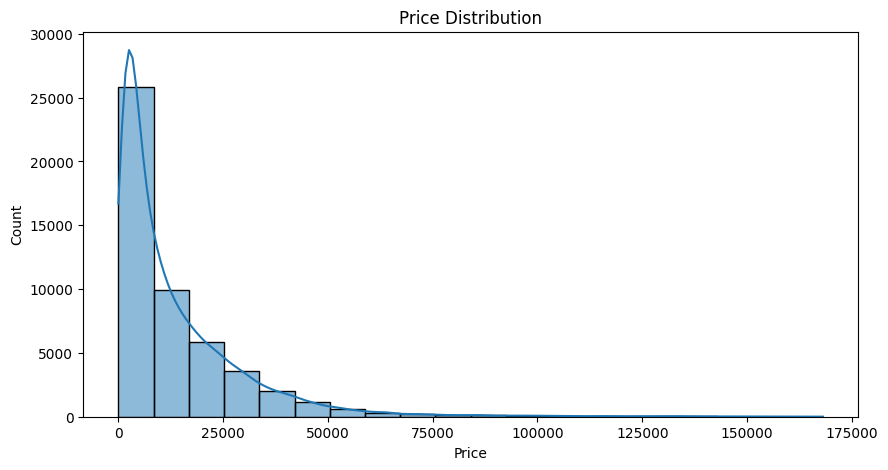

In [163]:
plt.figure(figsize=(10,5))
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [164]:
data.sort_values("Price", ascending=False).head(10)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
22786,BMW,M5,5.0,Petrol,2022,4590,168081
14860,BMW,M5,5.0,Petrol,2022,4683,168001
38438,Porsche,911,3.5,Petrol,2022,2931,167774
49362,Porsche,911,3.5,Petrol,2022,6963,164343
38166,BMW,M5,5.0,Petrol,2022,9797,163608
24675,BMW,M5,5.0,Petrol,2021,1437,159778
48704,BMW,M5,4.4,Petrol,2022,5485,156952
39082,BMW,M5,4.4,Petrol,2022,5710,156771
49500,BMW,M5,4.4,Petrol,2022,6395,156219
43253,BMW,M5,4.4,Petrol,2022,6494,156139


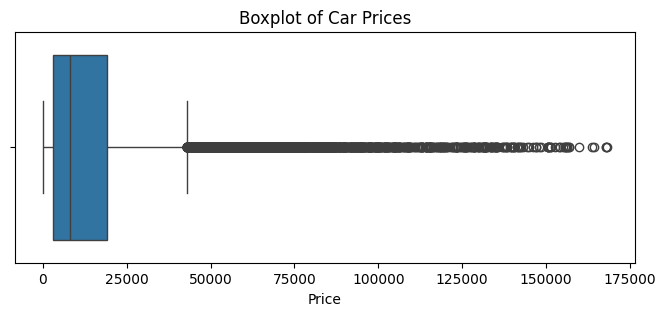

In [165]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

The boxplot and countplot of car prices reveal that prices are not normally distributed; rather, the distribution is positively skewed (right-skewed).  
This skewness is primarily due to the presence of a few rare models—such as luxury brands or high-performance variants— that have exceptionally high prices, particularly in recent years. These appear as distinct outliers in the boxplot.


Most car prices cluster in the lower- to mid-range, while a minority of cars show very high prices.
- Outliers visible in the boxplot correspond to unique, high-value vehicles that are not representative of the majority.
- Such skew and outlier presence may impact statistical analyses and models, warranting consideration for transformations (such as log scaling) or robust modeling methods.

Overall, this pattern reflects real-world market dynamics where a few luxury or rare models command much higher prices than standard vehicles.


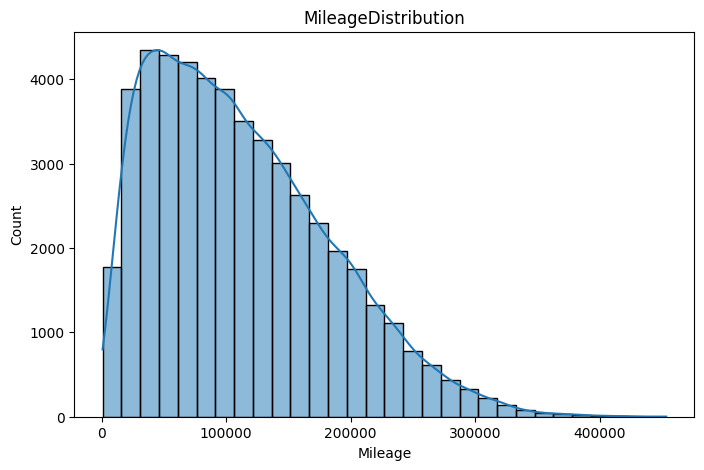

In [166]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Mileage'], bins=30, kde=True)
plt.title('MileageDistribution')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

In [167]:
#using correlation to understand the relationship between the variables (coulumns)
data_new.corr(numeric_only=True) 

,Engine size,Year of manufacture,Mileage,Price,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_911,Model_Cayenne,...,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Hybrid,Fuel type_Petrol
Engine size,1.000000,-0.000670,0.004365,0.398391,-0.255570,0.381314,-0.156752,-0.174076,0.192053,0.274253,...,-0.036197,-0.033031,-0.150908,-0.152764,0.133941,0.176246,-0.230781,0.156650,-0.128642,0.117837
Year of manufacture,-0.000670,1.000000,-0.807643,0.714195,-0.000862,0.008579,0.006483,-0.005843,0.002189,0.007464,...,0.004807,-0.009391,-0.001022,0.002674,0.002015,-0.005673,0.005498,-0.002006,0.004197,-0.003105
Mileage,0.004365,-0.807643,1.000000,-0.632817,0.000086,-0.002874,-0.009271,0.009061,-0.002845,-0.003041,...,-0.006902,0.011684,0.002739,-0.003629,-0.000752,-0.000868,-0.010238,-0.000116,-0.006720,0.004377
Price,0.398391,0.714195,-0.632817,1.000000,-0.125669,0.218326,0.018059,-0.137665,0.188253,0.120668,...,-0.017793,-0.018727,-0.120445,0.003339,0.104612,0.043156,-0.081725,0.023158,0.036756,-0.008607
Manufacturer_Ford,-0.255570,-0.000862,0.000086,-0.125669,1.000000,-0.153327,-0.378364,-0.425906,-0.087061,-0.086959,...,0.513450,-0.214642,-0.217537,-0.197143,-0.200247,-0.120036,-0.195047,-0.122111,-0.246001,0.043311
Manufacturer_Porsche,0.381314,0.008579,-0.002874,0.218326,-0.153327,1.000000,-0.135887,-0.152962,0.567809,0.567146,...,-0.078726,-0.077088,-0.078127,-0.070803,-0.071918,-0.043110,-0.070050,-0.043855,-0.126416,0.180485
Manufacturer_Toyota,-0.156752,0.006483,-0.009271,0.018059,-0.378364,-0.135887,1.000000,-0.377462,-0.077158,-0.077068,...,-0.194271,-0.190228,-0.192793,0.521041,0.529244,-0.106382,0.515501,-0.108222,0.761706,-0.328838
Manufacturer_VW,-0.174076,-0.005843,0.009061,-0.137665,-0.425906,-0.152962,-0.377462,1.000000,-0.086853,-0.086752,...,-0.218681,0.503967,0.510762,-0.196673,-0.199769,-0.119749,-0.194582,-0.121820,-0.297426,0.079260
Model_911,0.192053,0.002189,-0.002845,0.188253,-0.087061,0.567809,-0.077158,-0.086853,1.000000,-0.017733,...,-0.044701,-0.043771,-0.044361,-0.040203,-0.040835,-0.024478,-0.039775,-0.024902,-0.071780,0.130678
Model_Cayenne,0.274253,0.007464,-0.003041,0.120668,-0.086959,0.567146,-0.077068,-0.086752,-0.017733,1.000000,...,-0.044649,-0.043720,-0.044309,-0.040156,-0.040788,-0.024450,-0.039729,-0.024872,-0.071696,0.046067


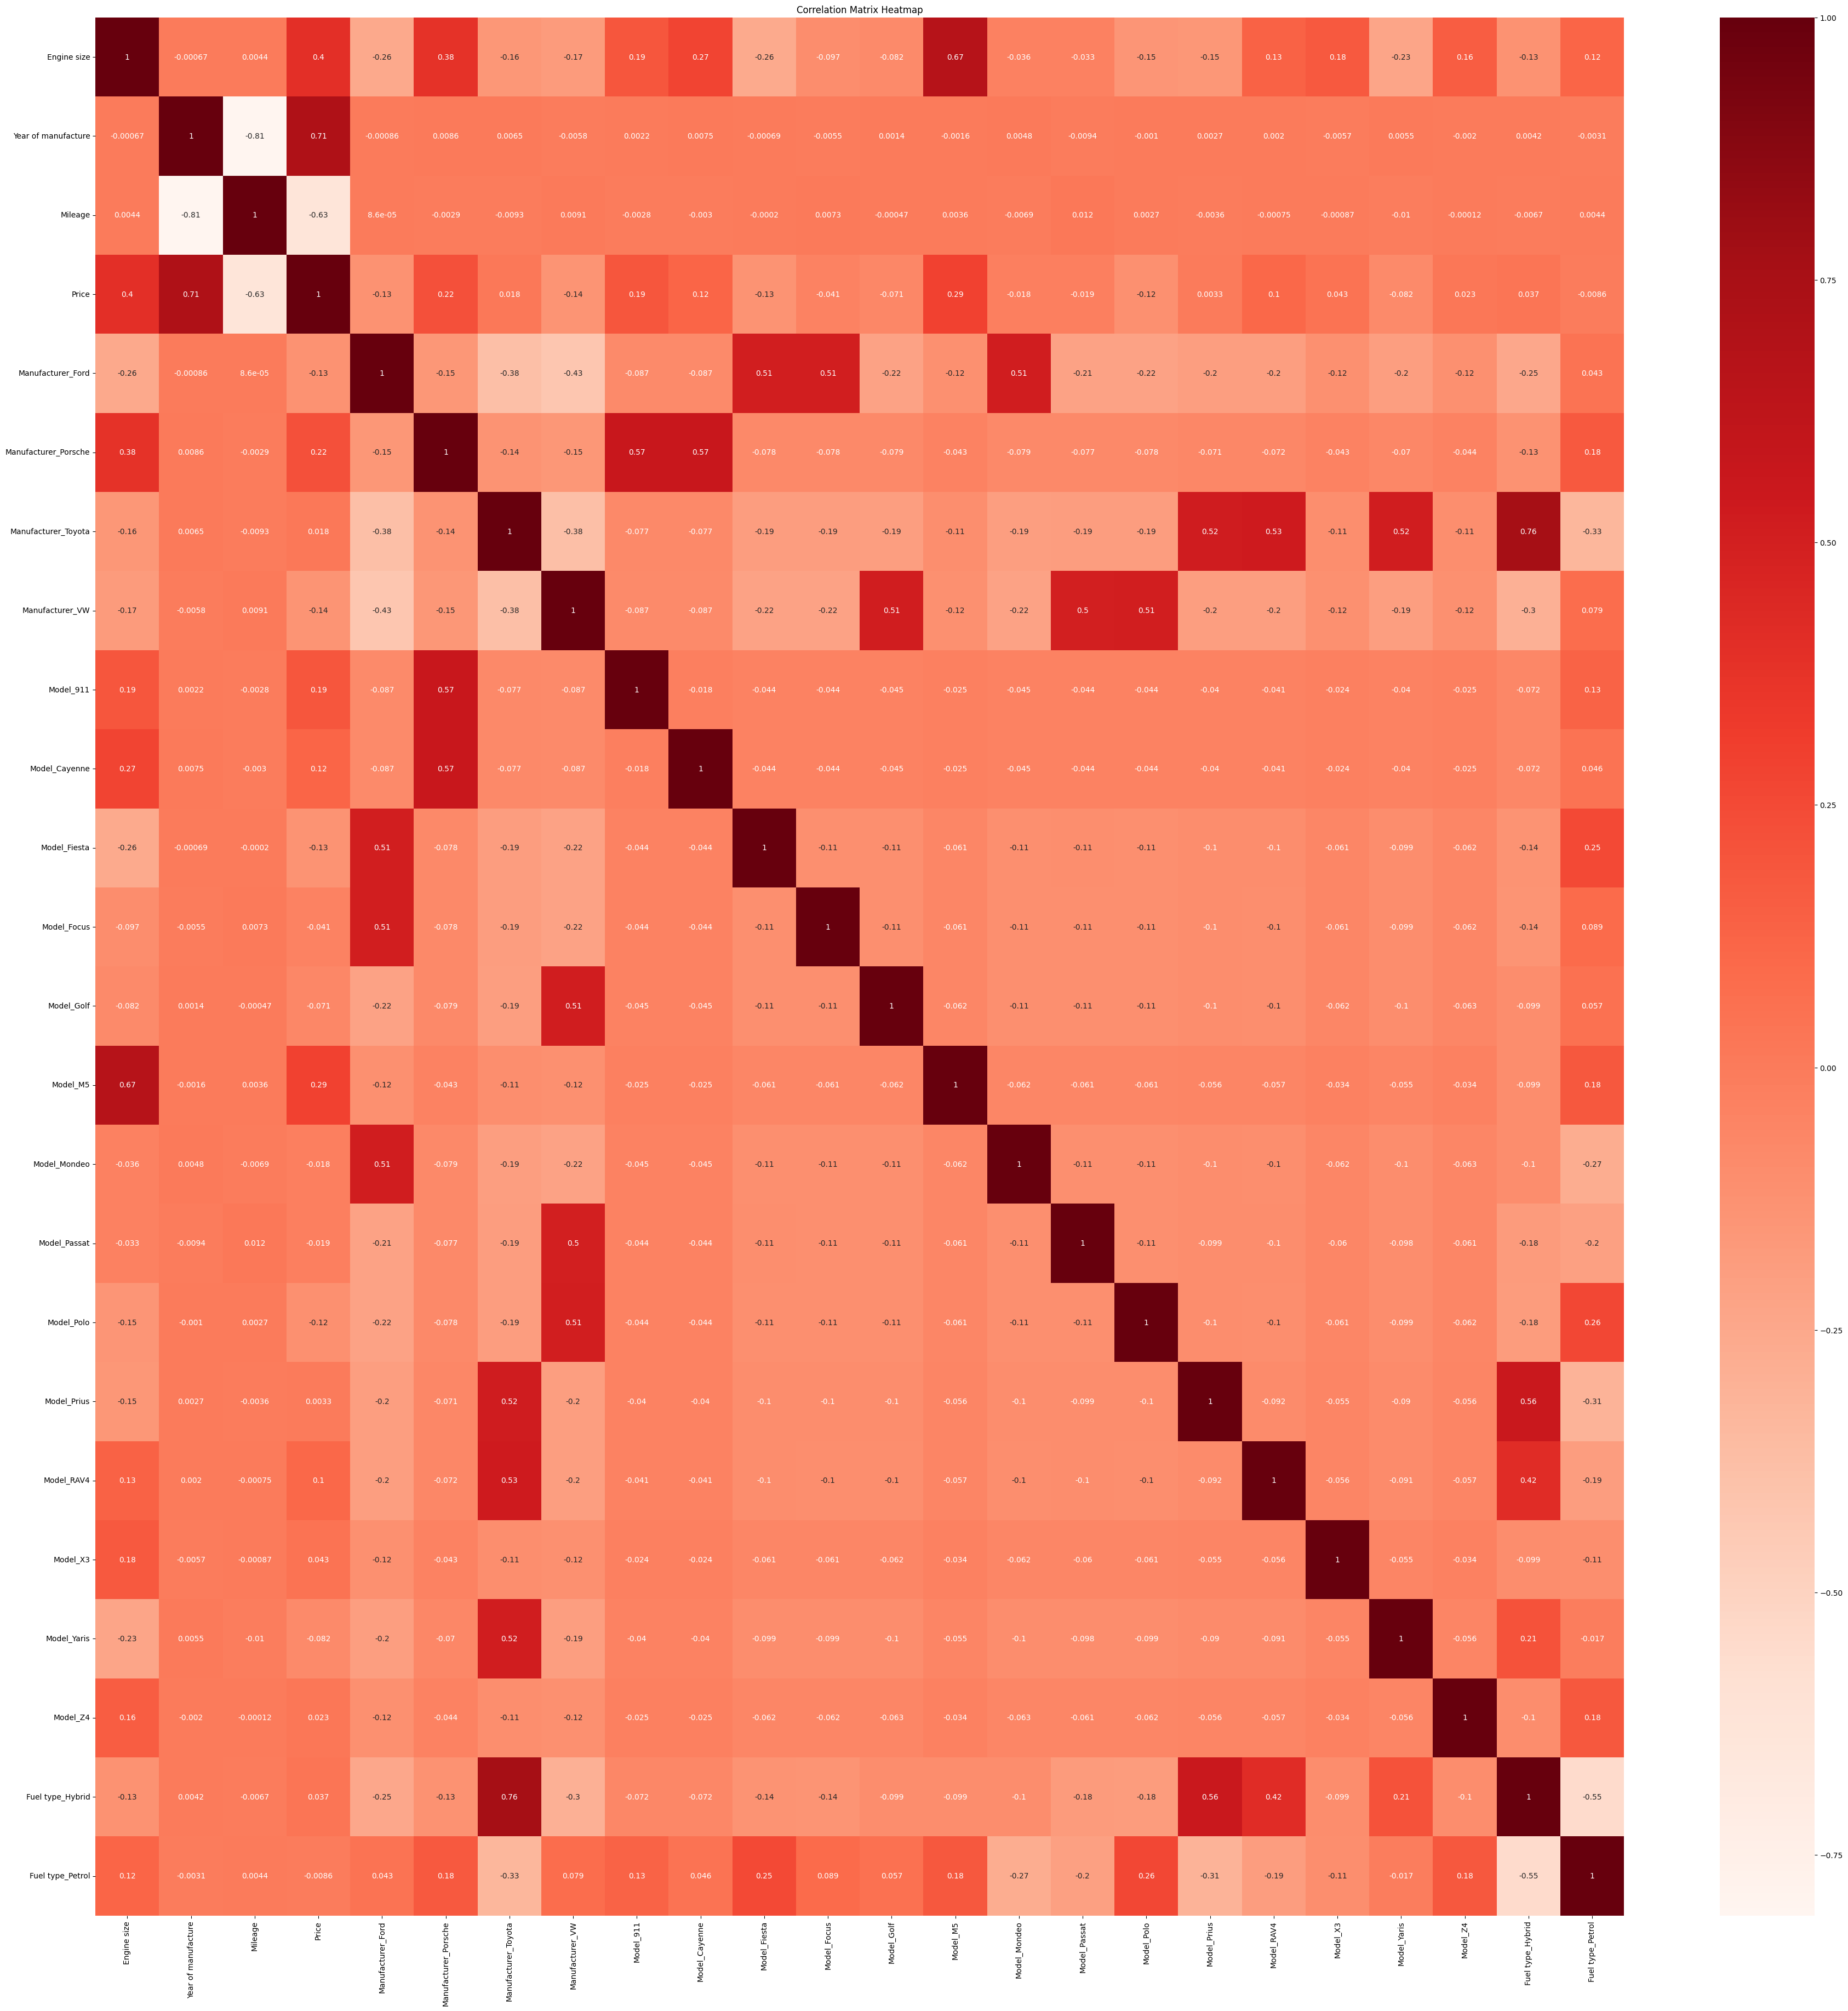

In [168]:
plt.figure(figsize=(45,45))
sns.heatmap(data_new.corr(numeric_only=True), annot=True,cmap='Reds')
plt.title("Correlation Matrix Heatmap")
plt.show()

From the correlation table and heat map the variables with values close to 1,-1 have strong relationship and values near to 0 had no linear relation as we want to predict price so after checking the values of price with other all features it can be said that price has high correlation with year of manufacture, engine size, mileage.

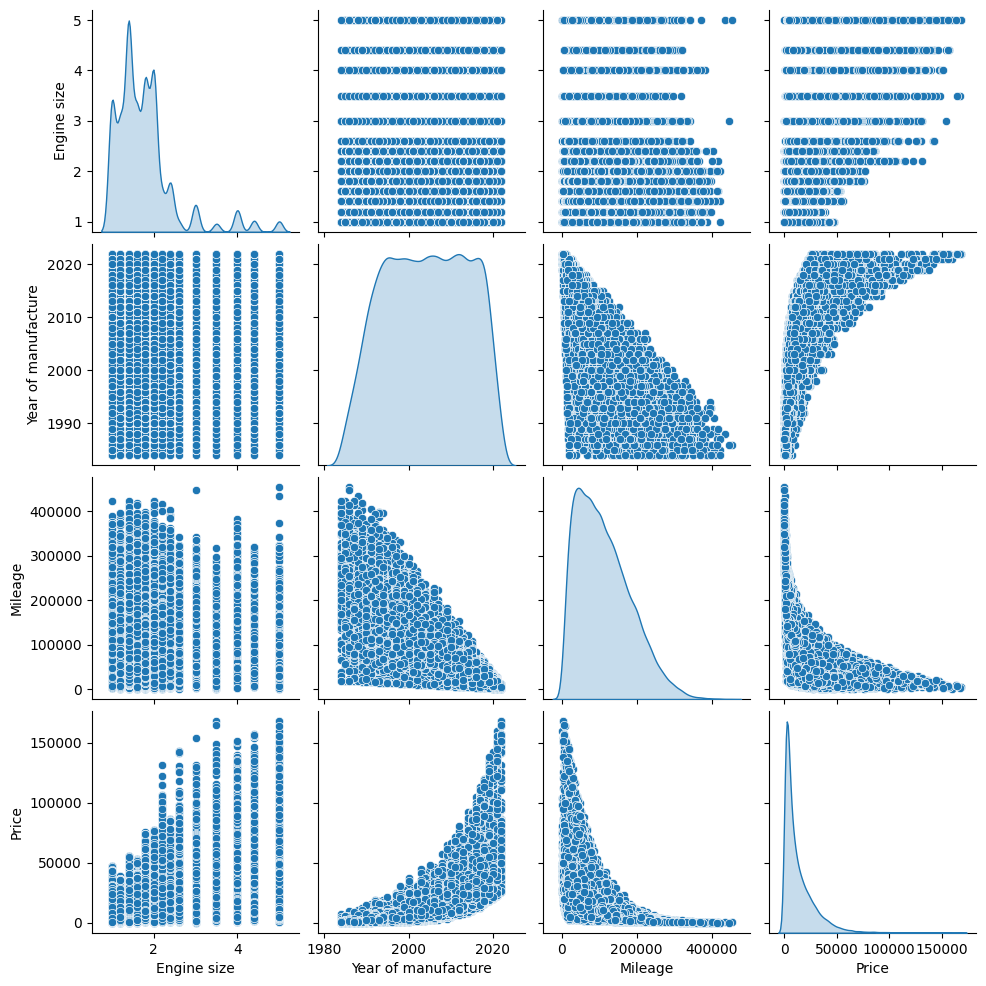

In [169]:
# Visualization of correlation results with seaborn library pairplot.
data_num = data.select_dtypes(include='number')
sns.pairplot(data_num, diag_kind="kde")
plt.show()

########################################################################################

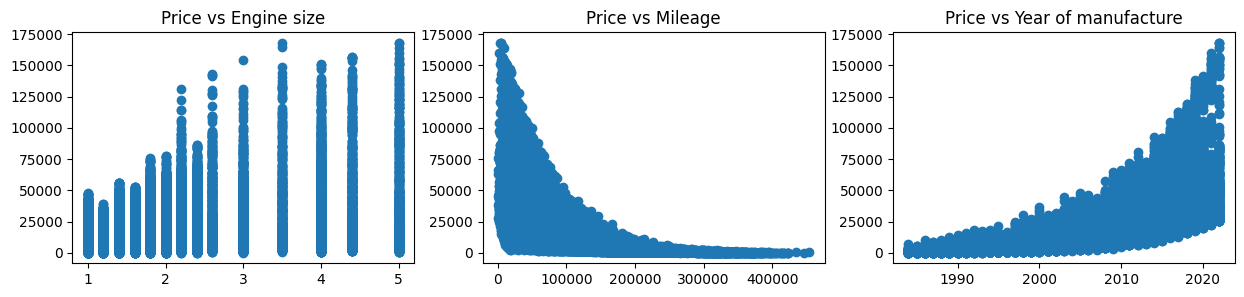

In [170]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_new['Engine size'],data_new['Price'])
ax1.set_title('Price vs Engine size')

ax2.scatter(data_new['Mileage'],data_new['Price'])
ax2.set_title('Price vs Mileage')

ax3.scatter(data_new['Year of manufacture'],data_new['Price'])
ax3.set_title('Price vs Year of manufacture')

plt.show()

The regression plot clearly indicates that the relationship of prices with these numerical variables is not linear. And for linear regression there must be linear relationship between the variables. So, lets transform the variable prices using log and then check the relationship.

In [171]:
log_price = np.log(data_new['Price'])
data_new['log_price'] = log_price
data_new=data_new.drop(['Price'],axis=1)
data_new.describe(include='all')

,Engine size,Year of manufacture,Mileage,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Model_911,Model_Cayenne,Model_Fiesta,...,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Fuel type_Hybrid,Fuel type_Petrol,log_price
count,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,...,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,0.299192,0.052193,0.251120,0.298192,0.017444,0.017404,0.098504,...,0.097403,0.099784,0.083440,0.085861,0.032648,0.081820,0.033748,0.224934,0.509722,8.902542
std,0.734149,9.646056,71624.341062,0.457909,0.222417,0.433662,0.457469,0.130921,0.130773,0.297997,...,0.296509,0.299715,0.276549,0.280161,0.177715,0.274092,0.180582,0.417543,0.499910,1.212775
min,1.000000,1984.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.330733
25%,1.400000,1996.000000,54375.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.026088
50%,1.600000,2004.000000,101011.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.983565
75%,2.000000,2012.000000,158617.250000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.853693
max,5.000000,2022.000000,453537.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.032201


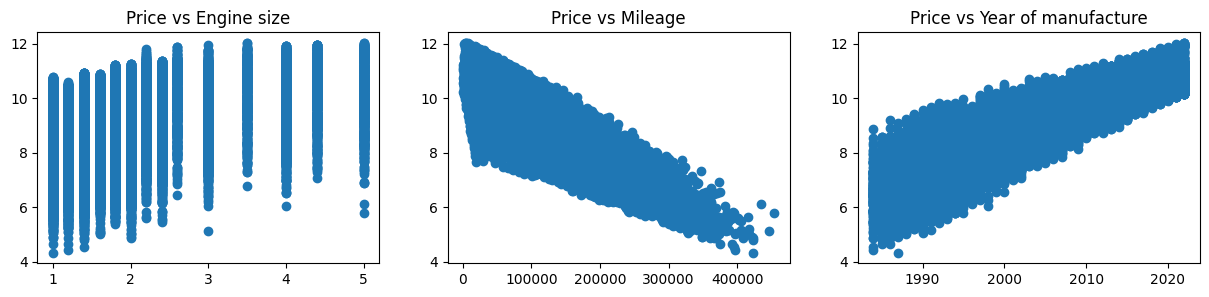

In [172]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,3))
ax1.scatter(data_new['Engine size'],data_new['log_price'])
ax1.set_title('Price vs Engine size')

ax2.scatter(data_new['Mileage'],data_new['log_price'])
ax2.set_title('Price vs Mileage')

ax3.scatter(data_new['Year of manufacture'],data_new['log_price'])
ax3.set_title('Price vs Year of manufacture')

plt.show()

Now, it can be seen that log(price) has linear relationship with the numerical variables.

DATA PREPARATION/SPLITTING
[SPLITING THE DATA INTO TRAINING AND TESTING DATA.]

In [173]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data_new,train_size=0.60,test_size=0.40, random_state=333)

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29992 entries, 46353 to 8173
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine size           29992 non-null  float64
 1   Year of manufacture   29992 non-null  int64  
 2   Mileage               29992 non-null  int64  
 3   Manufacturer_Ford     29992 non-null  uint8  
 4   Manufacturer_Porsche  29992 non-null  uint8  
 5   Manufacturer_Toyota   29992 non-null  uint8  
 6   Manufacturer_VW       29992 non-null  uint8  
 7   Model_911             29992 non-null  uint8  
 8   Model_Cayenne         29992 non-null  uint8  
 9   Model_Fiesta          29992 non-null  uint8  
 10  Model_Focus           29992 non-null  uint8  
 11  Model_Golf            29992 non-null  uint8  
 12  Model_M5              29992 non-null  uint8  
 13  Model_Mondeo          29992 non-null  uint8  
 14  Model_Passat          29992 non-null  uint8  
 15  Model_Polo           

In [175]:
df_train.shape

(29992, 24)

In [176]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19996 entries, 3675 to 43925
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Engine size           19996 non-null  float64
 1   Year of manufacture   19996 non-null  int64  
 2   Mileage               19996 non-null  int64  
 3   Manufacturer_Ford     19996 non-null  uint8  
 4   Manufacturer_Porsche  19996 non-null  uint8  
 5   Manufacturer_Toyota   19996 non-null  uint8  
 6   Manufacturer_VW       19996 non-null  uint8  
 7   Model_911             19996 non-null  uint8  
 8   Model_Cayenne         19996 non-null  uint8  
 9   Model_Fiesta          19996 non-null  uint8  
 10  Model_Focus           19996 non-null  uint8  
 11  Model_Golf            19996 non-null  uint8  
 12  Model_M5              19996 non-null  uint8  
 13  Model_Mondeo          19996 non-null  uint8  
 14  Model_Passat          19996 non-null  uint8  
 15  Model_Polo           

In [177]:
df_test.shape

(19996, 24)

FEATURE SCALING

In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var=['Engine size','Year of manufacture','Mileage','log_price']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In this above step, we apply MinMaxScaler to the numerical features: engine size, year of manufacture, mileage, and log-transformed price.  
MinMax scaling rescales each feature to the range [0, 1], ensuring that all numeric inputs are on a comparable scale before feeding them into machine learning models.
Scaling avoids bias toward larger-value features, improves model convergence, and helps produce more reliable coefficients.

In [179]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

I have used RFE(Recursive Feature Elimination), as in the heat map it was clear there are many features whihc are not important so, this feature selection method recursively removes the least important features based on an estimator model and ranks all of your features.

In [180]:
#Training data(input,output)
y_train = df_train.pop('log_price')
X_train = df_train

In [181]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Engine size', np.True_, np.int64(1)),
 ('Year of manufacture', np.True_, np.int64(1)),
 ('Mileage', np.True_, np.int64(1)),
 ('Manufacturer_Ford', np.True_, np.int64(1)),
 ('Manufacturer_Porsche', np.True_, np.int64(1)),
 ('Manufacturer_Toyota', np.False_, np.int64(2)),
 ('Manufacturer_VW', np.True_, np.int64(1)),
 ('Model_911', np.True_, np.int64(1)),
 ('Model_Cayenne', np.True_, np.int64(1)),
 ('Model_Fiesta', np.True_, np.int64(1)),
 ('Model_Focus', np.False_, np.int64(5)),
 ('Model_Golf', np.False_, np.int64(3)),
 ('Model_M5', np.True_, np.int64(1)),
 ('Model_Mondeo', np.False_, np.int64(4)),
 ('Model_Passat', np.True_, np.int64(1)),
 ('Model_Polo', np.True_, np.int64(1)),
 ('Model_Prius', np.False_, np.int64(9)),
 ('Model_RAV4', np.True_, np.int64(1)),
 ('Model_X3', np.False_, np.int64(7)),
 ('Model_Yaris', np.True_, np.int64(1)),
 ('Model_Z4', np.False_, np.int64(8)),
 ('Fuel type_Hybrid', np.True_, np.int64(1)),
 ('Fuel type_Petrol', np.False_, np.int64(6))]

lm is used for linear regression to act like an estimator based on which the RFE decide which is better and which is not. So, variable with True represents that it was selected. Here I have decided to select top 15 features for creating model and predicting car prices.

In [182]:
col = X_train.columns[rfe.support_]
col

Index(['Engine size', 'Year of manufacture', 'Mileage', 'Manufacturer_Ford',
       'Manufacturer_Porsche', 'Manufacturer_VW', 'Model_911', 'Model_Cayenne',
       'Model_Fiesta', 'Model_M5', 'Model_Passat', 'Model_Polo', 'Model_RAV4',
       'Model_Yaris', 'Fuel type_Hybrid'],
      dtype='object')

In [183]:
X_train.columns[~rfe.support_]

Index(['Manufacturer_Toyota', 'Model_Focus', 'Model_Golf', 'Model_Mondeo',
       'Model_Prius', 'Model_X3', 'Model_Z4', 'Fuel type_Petrol'],
      dtype='object')

In [184]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Engine size,7.63
1,Year of manufacture,6.25
5,Manufacturer_VW,5.19
2,Mileage,4.32
4,Manufacturer_Porsche,3.80
3,Manufacturer_Ford,3.70
9,Model_M5,2.78
14,Fuel type_Hybrid,2.20
7,Model_Cayenne,2.08
11,Model_Polo,2.04


I have used VIF(variance inflation factor)to check the presence of multicollinearity, variable with vif 1 indicates no correlation with other variables, values between 1 and 5 shows moderate correlation and above 5 or above 10 indicates high multicollinearity which may affect the model prediction.

In [186]:
import statsmodels.api as sm
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
# Check the parameters obtained
print(lr1.params)

const                   0.524856
Engine size             0.152735
Year of manufacture     0.314314
Mileage                -0.445310
Manufacturer_Ford      -0.007456
Manufacturer_Porsche    0.014886
Manufacturer_VW        -0.030727
Model_911               0.076211
Model_Cayenne           0.018159
Model_Fiesta           -0.053863
Model_M5                0.036865
Model_Passat            0.031888
Model_Polo             -0.025436
Model_RAV4              0.018551
Model_Yaris            -0.040218
Fuel type_Hybrid        0.018711
dtype: float64


In [187]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.791e+05
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:20:30   Log-Likelihood:             1.0424e+05
No. Observations:               29992   AIC:                        -2.084e+05
Df Residuals:                   29976   BIC:                        -2.083e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5249 

The value of R-square and adjusted R-square is 0.998, which indicates that the model explains 99.8% of the variability. Also, p-value of all features are less than (0.5%) means they are statistically significant contributors to the model.The variables Engine size, Year of manufacture, Mileage, and manufacturer/model dummies affect the predicted log-price strongly, confirmed by very high t-statistics.

Omnibus and Jarque-Bera tests suggest residuals are not perfectly normal (Prob = 0.000), Skew and Kurtosis show some deviation from perfect normality.
Durbin-Watson ≈ 2 suggests no autocorrelation in residuals.

TESTING THE MODEL USING TEST DATA

In [203]:
y_test = df_test.pop('log_price')
X_test = df_test
col = X_test.columns[rfe.support_]
X_test_rfe = X_test[col]
X_test_lm1 = sm.add_constant(X_test_rfe)
y_pred = lr1.predict(X_test_lm1)
y_pred

3675     0.897457
10370    0.610808
39685    0.330217
4704     0.514295
29115    0.589539
           ...   
27966    0.705445
5724     0.698191
13192    0.536338
49011    0.784051
43925    0.489109
Length: 19996, dtype: float64

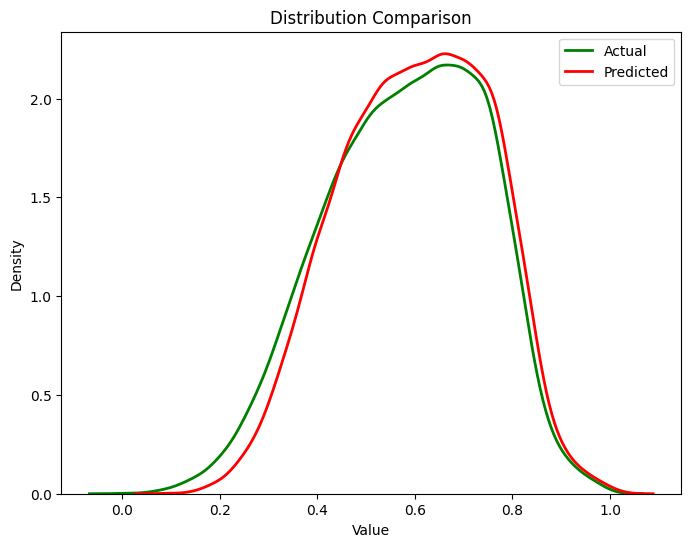

In [204]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, color='green', label='Actual', linewidth=2)
sns.kdeplot(y_pred, color='red', label='Predicted', linewidth=2)
plt.title('Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

The predicted and actual value distributions (KDEs) are very close to each other. This indicates that the regression model effectively captures the underlying patterns and predicts car prices accurately on the test data. The strong overlap between the two curves reflects good model performance and generalization.